<a href="https://colab.research.google.com/github/Yiting916/ML/blob/main/2-05.%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 線性回歸（Linear Regression）

線性回歸是一種統計學和機器學習中常見的回歸分析方法，用於研究自變數（特徵）和因變數（目標）之間的線性關係。其目的是建立一個數學模型，用來預測或解釋自變數與因變數之間的關聯。

## 原理

線性回歸的核心假設是因變數 $y$ 與自變數 $x_1, x_2, \dots, x_n$ 之間的關係可以表示為一個線性方程式：

$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon $

這裡：
- $y$ 是因變數（目標變數），也就是我們想要預測的變量。
- $x_1, x_2, \dots, x_n$ 是自變數（特徵變數），也就是用來預測 $y$ 的變量。
- $\beta_0$ 是截距項，表示當所有自變數為 0 時，因變數的預測值。
- $\beta_1, \beta_2, \dots, \beta_n$ 是每個自變數對因變數影響的係數，代表每個特徵對預測結果的貢獻程度。
- $\epsilon$ 是誤差項，表示模型預測與實際觀測值之間的差異。

## 目標

線性回歸的目標是通過學習數據集來找到最合適的係數($\beta_0, \beta_1, \dots, \beta_n$），使得預測值與實際觀察值之間的誤差最小。這個過程通常是通過**最小二乘法**來實現的，最小化以下損失函數：

$\text{Loss} = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$

其中 $y_i$ 是第 $i$ 個觀測值，$\hat{y}_i$ 是模型預測的值，$m$ 是觀測樣本數。

## 優點

- **簡單易懂**：
   線性回歸是一個直觀且數學上簡單的模型，易於理解和解釋。
- **計算效率高**：
   由於其數學模型較為簡單，計算效率高，尤其在處理大規模數據時表現良好。
- **模型解釋性強**：
   線性回歸的係數（$\beta$）可以解釋每個特徵對預測結果的影響，有助於模型的解釋和可解釋性。
- **廣泛應用**：
   線性回歸在很多領域中都有廣泛的應用，如經濟學、工程學、醫學等，特別適合於數據呈現線性關係的情況。
- **不容易過擬合**：
   當模型的複雜度較低時（例如在只有少數特徵的情況下），線性回歸不容易出現過擬合現象。

## 缺點

- **對線性關係的假設**：
   線性回歸假設自變數與因變數之間存在線性關係，這在某些情況下可能並不成立。如果數據呈現非線性關係，線性回歸將無法捕捉到數據的真實模式。
- **對異常值敏感**：
   線性回歸對極端的異常值非常敏感，異常值可能會顯著影響模型的結果和預測能力。
- **共線性問題**：
   當多個自變數之間存在高度相關性時（即共線性），會影響係數估計的穩定性，甚至可能導致模型不可靠。
- **假設正態性**：
   線性回歸假設誤差項服從正態分佈，這對某些數據集可能不成立。若誤差項不符合正態分佈，模型的預測結果和統計推斷可能不準確。
- **無法捕捉複雜的關係**：
   線性回歸無法有效處理高度非線性或複雜的數據模式。如果數據存在複雜的交互作用或非線性關係，可能需要使用更複雜的模型（如決策樹、支持向量機、神經網絡等）。

## 應用

線性回歸廣泛應用於許多領域，如：
- 預測股市走勢
- 預測房價
- 預測銷售額
- 經濟學中的需求與供應分析

線性回歸是一種簡單而直觀的方法，用來理解和預測數據中的線性關係。

## 參考資料
* Python Data Science Handbook, Jake VanderPlas
* Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, Aurélien Géron



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## 直線

In [2]:
# 這裡先產生一份測試用的資料
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

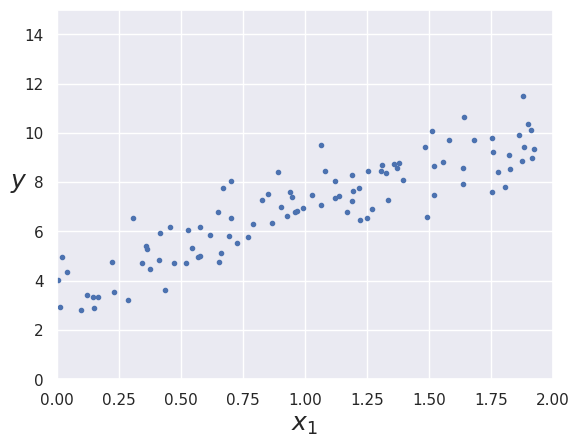

In [3]:
# 將測試資料畫出來
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

直線的方程式
$ y = slope(斜率) * x + bias(基底)$

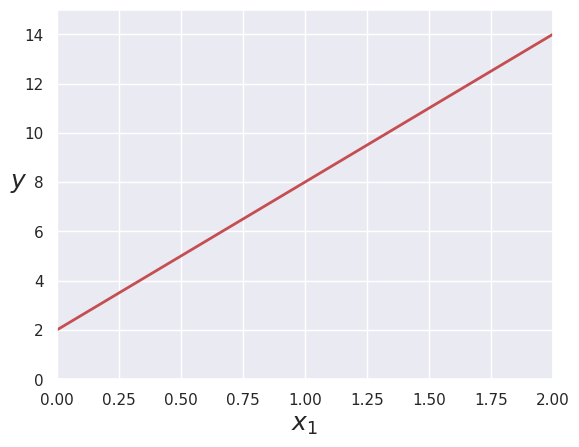

In [4]:
# 測試並觀看一下直線方程式
# 可以調整 bias 與 slope 兩個值來看直線的變化
bias = 2    # 基底
slope = 6  # 斜率

theta_best = [[bias],[slope]]
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, "r-", linewidth=2)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

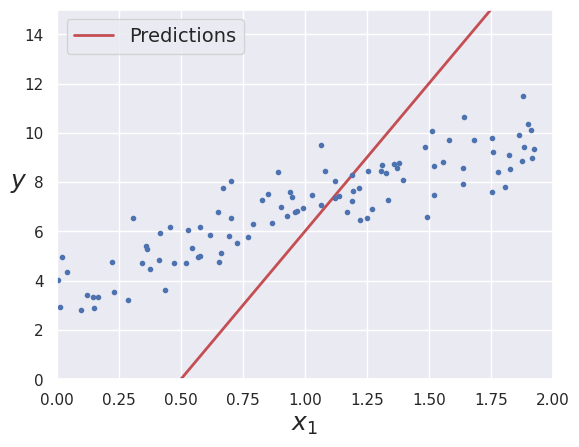

In [5]:
# 將這條直線跟資料畫在一起看看
# 嘗試著調整 bias 與 slope 兩個值來讓直線貼近資料
bias = -6    # 基底
slope = 12  # 斜率

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = [[bias],[slope]]
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

## 使用線性回歸來預測

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#產生二維測試資料
rate = 0.5
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)*rate

model = LinearRegression().fit(x, y)
model.score(x, y) #這裡的成績是使用coefficient of determination R2

0.9156609566424067

In [7]:
# 回歸方程式的 w
model.coef_

array([[2.95745248]])

In [8]:
# 回歸方程式的 b
model.intercept_

array([4.04927617])

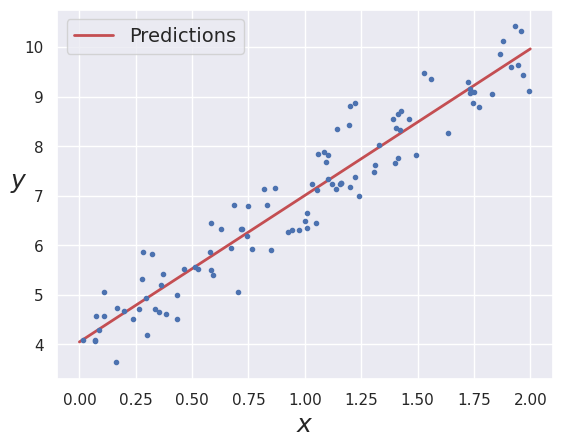

In [9]:
x_new = np.array([[0], [2]])
y_predict = model.predict(x_new)

plt.plot(x_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(x, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

## 多個變數欄位

In [10]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


## 如果資料不是線性的

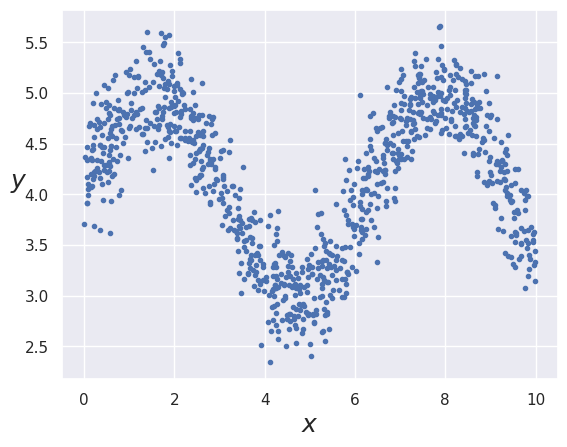

In [11]:
rate = 0.3
x = 10 * np.random.rand(1000, 1)
y = 4 + np.sin(x) + np.random.randn(1000, 1)*rate

plt.plot(x, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [12]:
model = LinearRegression().fit(x, y)
model.score(x, y) #這裡的成績是使用coefficient of determination R2

0.0027613595754858444

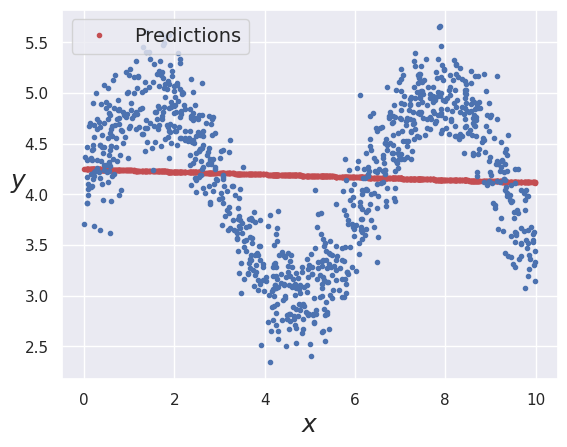

In [13]:
y_predict = model.predict(x)

plt.plot(x, y_predict, "r.", linewidth=2, label="Predictions")
plt.plot(x, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

## 資料進行前處理 PolynomialFeatures

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4)
x_new = poly.fit_transform(x)

model = LinearRegression().fit(x_new, y)
model.score(x_new, y) #這裡的成績是使用coefficient of determination R2

0.7702082202264342

In [15]:
x_new.shape

(1000, 5)

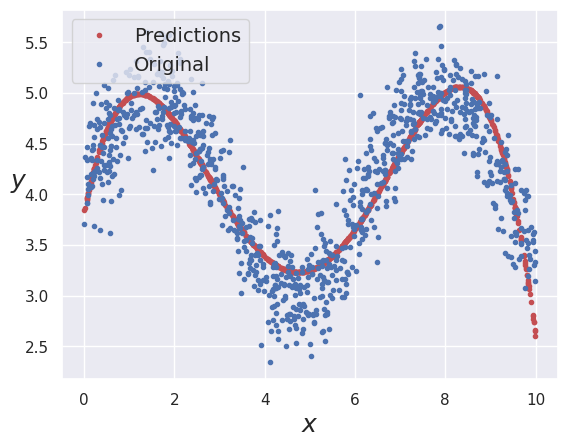

In [16]:
y_predict = model.predict(x_new)

plt.plot(x, y_predict, "r.", label="Predictions")
plt.plot(x, y, "b.", label='Original')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [17]:
model.coef_

array([[ 0.        ,  2.19879528, -1.26032477,  0.21632014, -0.01135106]])

## 看看 PolynomialFeatures的工作

In [18]:
x = [[0.1], [1], [2], [3]]

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4)
x_new = poly.fit_transform(x)
x_new

array([[1.0e+00, 1.0e-01, 1.0e-02, 1.0e-03, 1.0e-04],
       [1.0e+00, 1.0e+00, 1.0e+00, 1.0e+00, 1.0e+00],
       [1.0e+00, 2.0e+00, 4.0e+00, 8.0e+00, 1.6e+01],
       [1.0e+00, 3.0e+00, 9.0e+00, 2.7e+01, 8.1e+01]])

In [19]:
x

[[0.1], [1], [2], [3]]

## 多項式的 PolynomialFeatures

In [20]:
x = [[0.1, 2]]

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4)
x_new = poly.fit_transform(x)
x_new

array([[1.0e+00, 1.0e-01, 2.0e+00, 1.0e-02, 2.0e-01, 4.0e+00, 1.0e-03,
        2.0e-02, 4.0e-01, 8.0e+00, 1.0e-04, 2.0e-03, 4.0e-02, 8.0e-01,
        1.6e+01]])

假設兩個變數 a b
上面的輸出為
1, a, b,
a^2, a*b, b^2,
a^3, a^2*b, a*b^2, b^3,
a^4, a^3*b, a^2*b^2, a*b^3, b^4

In [21]:
x = np.random.rand(1, 30)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4)
x_new = poly.fit_transform(x)
x_new.shape

(1, 46376)

# LogisticRegression

## Decision Boundaries

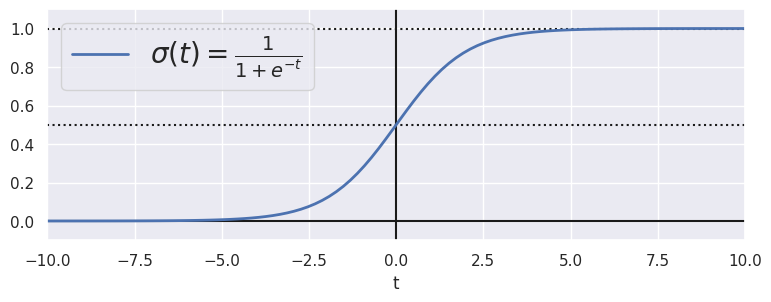

In [22]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

## Example

In [23]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [24]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [25]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int32)  # 1 if Iris virginica, else 0

In [26]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

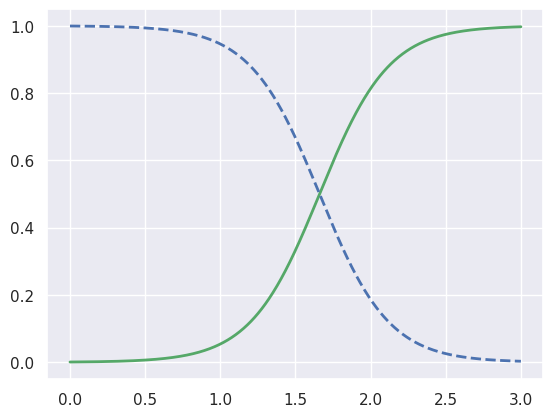

In [27]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

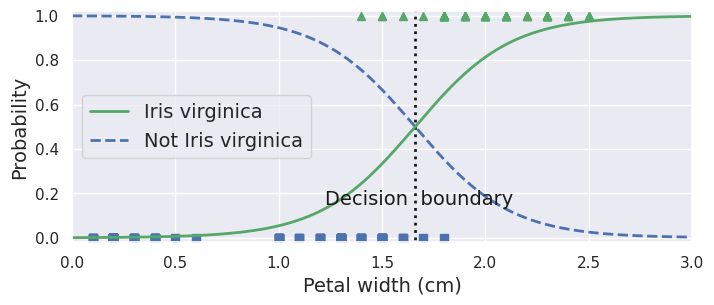

In [28]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [29]:
decision_boundary

array([1.66066066])

In [30]:
log_reg.predict([[1.7], [1.5]])

array([1, 0], dtype=int32)

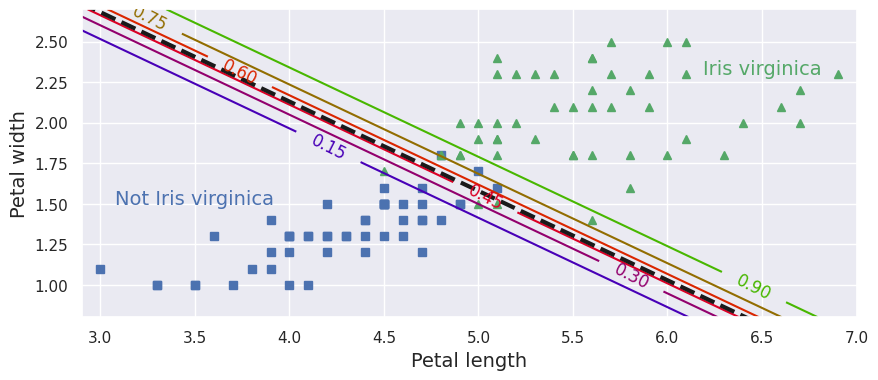

In [31]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int32)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [32]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

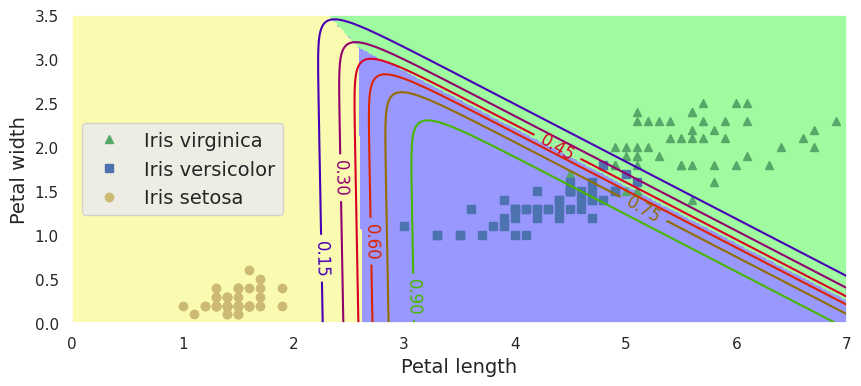

In [33]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

# Regularization 正規化

In [34]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)

In [35]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression()) # 把上一個的輸出變成下一個的輸入
poly_model # 等於PolynomialFeatures()+ LinearRegression()

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

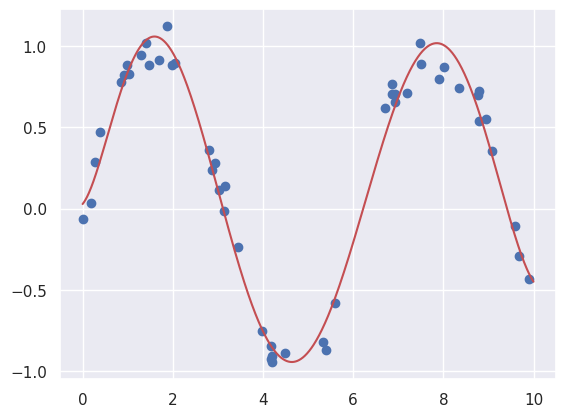

In [37]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, 'r');

## 自定義 GaussianFeatures

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

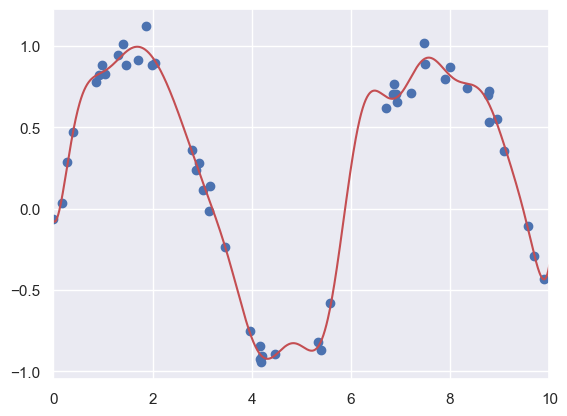

In [ ]:
from sklearn.pipeline import make_pipeline

gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,'r')
plt.xlim(0, 10);

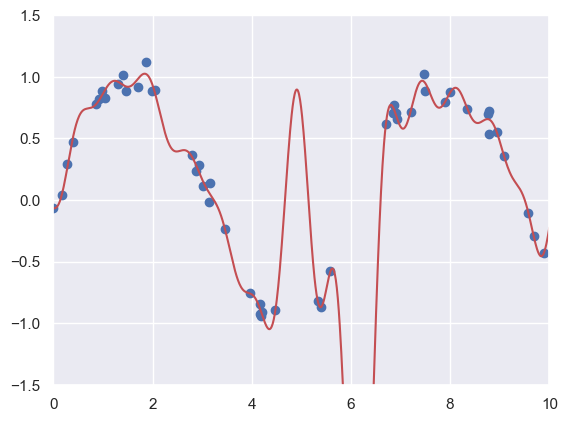

In [ ]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]),'r')

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

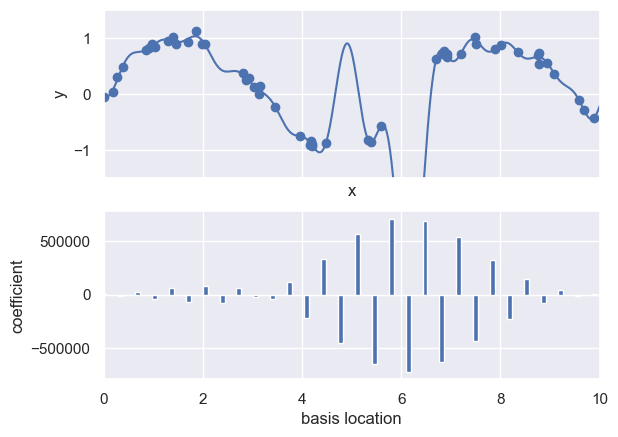

In [ ]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))

    if title:
        ax[0].set_title(title)

    ax[1].bar(model.steps[0][1].centers_,
               model.steps[1][1].coef_, width=0.1)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))

model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

## Ridge regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.
This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator:

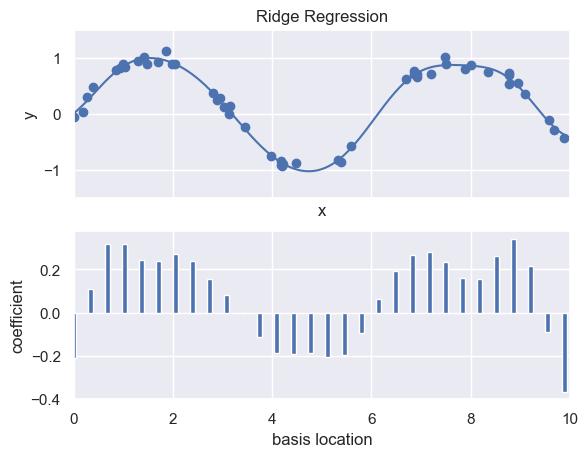

In [ ]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

### Lasso regression ($L_1$ regularization)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets model coefficients to exactly zero.

We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients:

C:\venv\class\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


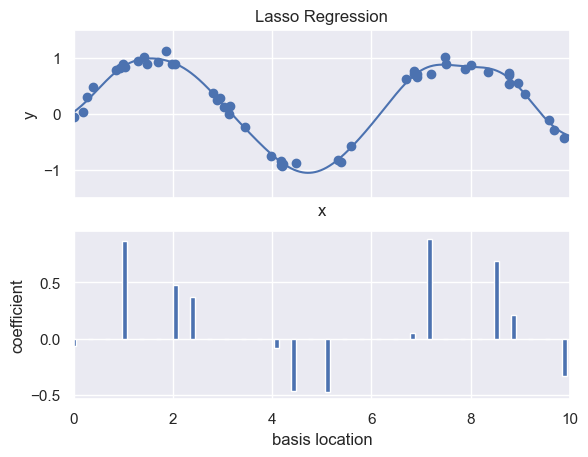

In [ ]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

### alpha值的影響可以參考
https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py

# 重要參數說明
### [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* positive : bool, default=False

### [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

### [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
* degree : int or tuple (min_degree, max_degree), default=2
